In [6]:
# Install if needed
# !pip install pandas numpy seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
# Upload the file manually in Colab
from google.colab import files
uploaded = files.upload()

# Read the dataset (replace filename if different)
df = pd.read_csv("traffic_congestion.csv")

# Check column names and preview data
print("Columns:", df.columns.tolist())
df.head()


Saving traffic_congestion.csv to traffic_congestion (1).csv
Columns: ['sensor_count', 'avg_speed', 'time_of_day', 'congestion_level']


,sensor_count,avg_speed,time_of_day,congestion_level
0,4,21.723781,morning,medium
1,17,17.319749,morning,low
2,3,54.550117,night,high
3,13,59.453301,night,high
4,9,12.211030,evening,medium


In [9]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill numeric NaNs with median (though you have no missing values)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode any categorical features (if any)
label_encoders = {}
for col in df.select_dtypes(include='object'):
    if col != 'congestion_level':  # Don't encode target here
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
X = df.drop('congestion_level', axis=1)
y = df['congestion_level']

# Encode target labels (e.g., Low, Medium, High → 0, 1, 2)
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Missing values:
 sensor_count        0
avg_speed           0
time_of_day         0
congestion_level    0
dtype: int64


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.38      0.43      0.40         7
           2       0.50      0.44      0.47         9

    accuracy                           0.35        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.36      0.35      0.35        20



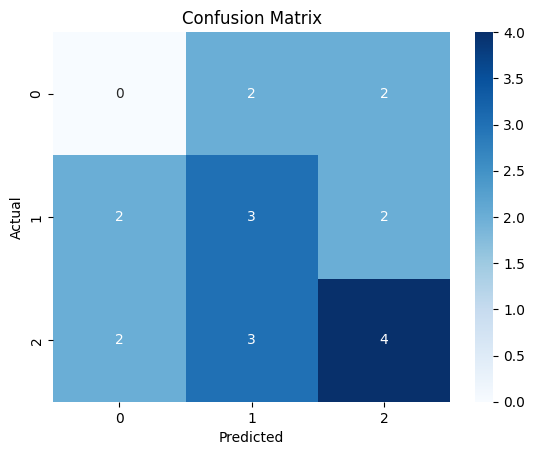

In [13]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Convert numeric labels to their original string class names
target_names = [str(cls) for cls in target_encoder.classes_]

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

